In [1]:
import lucem_illud as lucem_illud_2020 #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

In [5]:
cd ..

/Users/lilygrier/git/ContentAnalysisPresidentialRhetoric


In [6]:
from utils.utils import *
from topic_modeling.PrepareText import PrepareText


In [7]:

import lucem_illud 
from utils.utils import *
from topic_modeling.TopicModeling import TopicModels as LDA_barrosoluquer
from topic_modeling.PrepareText import PrepareText
%load_ext autoreload
%autoreload 2

import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import gensim
import numpy as np 
import pandas as pandas
import matplotlib.pyplot as plt 
import matplotlib.cm 
import seaborn as sns

%matplotlib inline

import itertools
import re
import json

In [14]:
ls

full_exec_orders_text.csv   presidential_speeches.xlsx


In [16]:
filepath = '../data/full_exec_orders_text.csv'

In [17]:
pd.read_csv(filepath)

,Unnamed: 0,Unnamed: 0.1,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,president,order_text
0,0,0.0,82 FR 8115,2017-01623,8129,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/23/2017,01/17/2017,8115,"Amending the Civil Service Rules, Executive Or...","Amends: EO 13467, June 30, 2008; EO 13488, Jan...",13764.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
1,1,1.0,82 FR 7619,2017-01487,7620,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7619,Providing an Order of Succession Within the De...,"Revokes: EO 13557, November 4, 2010\nRevoked b...",13762.0,barack_obama,"\n\n\nExecutive Order 13762 of January 13, 201..."
2,2,2.0,82 FR 7621,2017-01489,7622,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7621,Providing an Order of Succession Within the En...,"Revokes: EO 13737, August 12, 2016",13763.0,barack_obama,"\n\n\nExecutive Order 13763 of January 13, 201..."
3,3,3.0,82 FR 5331,2017-01197,5333,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/18/2017,01/13/2017,5331,Recognizing Positive Actions by the Government...,"Revokes in part: EO 13067, November 3, 1997\nR...",13761.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
4,4,4.0,82 FR 5321,2017-01164,5322,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/17/2017,01/12/2017,5321,Amending Executive Order 11016 To Update Eligi...,"Amends: EO 11016, April 25, 1962",13758.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1071,NaN,86 FR 7029,2021-01762,7035,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7029,Ethics Commitments by Executive Branch Personnel,NaN,13989.0,joe_biden,\n\nTitle 3—\nThe President\n\nExecutive Order...
1070,1072,NaN,86 FR 7037,2021-01765,7043,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7037,Protecting Public Health and the Environment a...,NaN,13990.0,joe_biden,"\n\n\nExecutive Order 13990 of January 20, 202..."
1071,1073,NaN,86 FR 7045,2021-01766,7048,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7045,Protecting the Federal Workforce and Requiring...,NaN,13991.0,joe_biden,"\n\n\nExecutive Order 13991 of January 20, 202..."
1072,1074,NaN,86 FR 7049,2021-01767,7050,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7049,Revocation of Certain Executive Orders Concern...,NaN,13992.0,joe_biden,"\n\n\nExecutive Order 13992 of January 20, 202..."


In [20]:
exec_orders = pd.read_csv(filepath)

In [21]:
exec_orders

,Unnamed: 0,Unnamed: 0.1,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,president,order_text
0,0,0.0,82 FR 8115,2017-01623,8129,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/23/2017,01/17/2017,8115,"Amending the Civil Service Rules, Executive Or...","Amends: EO 13467, June 30, 2008; EO 13488, Jan...",13764.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
1,1,1.0,82 FR 7619,2017-01487,7620,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7619,Providing an Order of Succession Within the De...,"Revokes: EO 13557, November 4, 2010\nRevoked b...",13762.0,barack_obama,"\n\n\nExecutive Order 13762 of January 13, 201..."
2,2,2.0,82 FR 7621,2017-01489,7622,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7621,Providing an Order of Succession Within the En...,"Revokes: EO 13737, August 12, 2016",13763.0,barack_obama,"\n\n\nExecutive Order 13763 of January 13, 201..."
3,3,3.0,82 FR 5331,2017-01197,5333,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/18/2017,01/13/2017,5331,Recognizing Positive Actions by the Government...,"Revokes in part: EO 13067, November 3, 1997\nR...",13761.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
4,4,4.0,82 FR 5321,2017-01164,5322,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/17/2017,01/12/2017,5321,Amending Executive Order 11016 To Update Eligi...,"Amends: EO 11016, April 25, 1962",13758.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1071,NaN,86 FR 7029,2021-01762,7035,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7029,Ethics Commitments by Executive Branch Personnel,NaN,13989.0,joe_biden,\n\nTitle 3—\nThe President\n\nExecutive Order...
1070,1072,NaN,86 FR 7037,2021-01765,7043,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7037,Protecting Public Health and the Environment a...,NaN,13990.0,joe_biden,"\n\n\nExecutive Order 13990 of January 20, 202..."
1071,1073,NaN,86 FR 7045,2021-01766,7048,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7045,Protecting the Federal Workforce and Requiring...,NaN,13991.0,joe_biden,"\n\n\nExecutive Order 13991 of January 20, 202..."
1072,1074,NaN,86 FR 7049,2021-01767,7050,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7049,Revocation of Certain Executive Orders Concern...,NaN,13992.0,joe_biden,"\n\n\nExecutive Order 13992 of January 20, 202..."


In [22]:
targetDF = exec_orders
textColumn = 'order_text'
numCategories = 5
numClusters = 5

In [23]:
# tf idf vectorizing
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.4, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
TFVects = TFVectorizer.fit_transform(targetDF[textColumn])

# run k means
KM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
KM.fit(TFVects)


terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = KM.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 council
 committee
 health
 board
 commission
 service
 advisory
 defense
 programs
 report


Cluster 1:
 register
 presidential
 documents
 page
 volume
 1996
 1997
 1998
 1995
 tuesday


Cluster 2:
 property
 blocked
 interests
 ieepa
 persons
 treasury
 50
 emergency
 entity
 iran


Cluster 3:
 schedule
 pay
 hereto
 hereof
 rates
 attached
 basic
 schedules
 payments
 judges


Cluster 4:
 task
 force
 attorney
 chair
 health
 development
 environmental
 recommendations
 report
 local




In [24]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(exec_orders['president'], KM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(exec_orders['president'], KM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(exec_orders['president'], KM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(exec_orders['president'], KM.labels_)))

For our clusters:
Homogeneity: 0.138
Completeness: 0.208
V-measure: 0.166
Adjusted Rand Score: 0.068


In [25]:
# tf idf vectorizing
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.3, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
TFVects = TFVectorizer.fit_transform(targetDF[textColumn])

# run k means
KM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
KM.fit(TFVects)


terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = KM.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 register
 documents
 page
 volume
 1997
 1996
 1998
 1995
 tuesday
 97


Cluster 1:
 property
 blocked
 interests
 ieepa
 treasury
 persons
 50
 emergency
 entity
 iran


Cluster 2:
 december
 board
 inserting
 striking
 2001
 emergency
 assistant
 succession
 2003
 immunities


Cluster 3:
 schedule
 pay
 hereto
 hereof
 rates
 attached
 basic
 schedules
 payments
 37


Cluster 4:
 task
 committee
 force
 commission
 advisory
 programs
 american
 education
 local
 chair




In [26]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(exec_orders['president'], KM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(exec_orders['president'], KM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(exec_orders['president'], KM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(exec_orders['president'], KM.labels_)))

For our clusters:
Homogeneity: 0.174
Completeness: 0.201
V-measure: 0.187
Adjusted Rand Score: 0.093


In [27]:
# perform PCA and visualize
PCA = sklearn.decomposition.PCA(n_components = 2).fit(TFVects.toarray())
reducedPCA_data = PCA.transform(TFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))
colors_p = [colors[l] for l in KM.labels_]

In [28]:
components = PCA.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [29]:
colordict = {
'barack_obama': 'red',
'george_w_bush': 'orange',
'william_j_clinton': 'green',
'donald_trump': 'blue',
'joe_biden': 'purple'
    }
colors = [colordict[c] for c in exec_orders['president']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('barack_obama', 'red'), ('george_w_bush', 'orange'), ('william_j_clinton', 'green'), ('donald_trump', 'blue'), ('joe_biden', 'purple')])


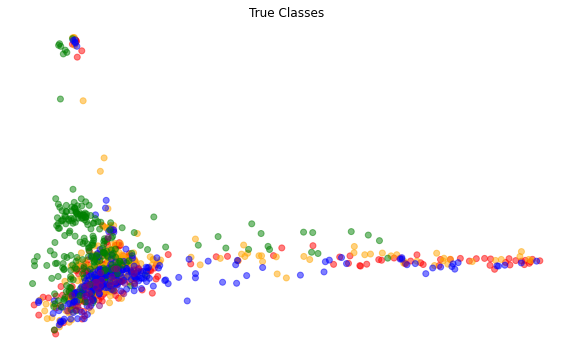

In [30]:

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

In [31]:
re.match(r'Sec. d+.', ' purposes.\n“(vii) ensure t')

In [32]:
re.search(r'\([xiv]+\)', ' purposes.\n“(vii) ensure t')

<re.Match object; span=(12, 17), match='(vii)'>

In [33]:
text = 'ollows:\n\n“Sec. 2.2. Reciprocity. Except as otherwise authorized by law or policy issued by the applicable Executive Agent, age'

In [34]:
re.search(r'Sec. \d+(.\d)?', text)

<re.Match object; span=(10, 18), match='Sec. 2.2'>

In [39]:
def clean_raw_text(text):
    '''
    Cleans executive order text by getting rid of section headings, 
    roman numeral and alphanumeric bulleting.
    '''
    text = re.sub(r'\([xiv]+\)', '', text)
    text = re.sub(r'\([A-Za-z]\)', '', text)
    text = re.sub(r'Sec. \d+(.\d)?', '', text)
    return text

In [40]:
re.sub(r'\([A-Za-z]\)', '', 'vetting for fitness.\n“(d) All covered individuals shall be subject to continuous vetting under standards (including, but)')

'vetting for fitness.\n“ All covered individuals shall be subject to continuous vetting under standards (including, but)'

In [41]:
exec_orders['clean_text'] = exec_orders['order_text'].apply(lambda x: clean_raw_text(x))

In [42]:

#Apply our functions
exec_orders['tokenized_text'] = exec_orders['clean_text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
exec_orders['normalized_tokens'] = exec_orders['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [44]:
exec_orders.head()

,Unnamed: 0,Unnamed: 0.1,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,president,order_text,clean_text,tokenized_text,normalized_tokens
0,0,0.0,82 FR 8115,2017-01623,8129,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/23/2017,01/17/2017,8115,"Amending the Civil Service Rules, Executive Or...","Amends: EO 13467, June 30, 2008; EO 13488, Jan...",13764.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...,\n\nTitle 3—\nThe President\n\nExecutive Order...,"[Title, 3, The, President, Executive, Order, 1...","[title, president, executive, order, january, ..."
1,1,1.0,82 FR 7619,2017-01487,7620,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7619,Providing an Order of Succession Within the De...,"Revokes: EO 13557, November 4, 2010\nRevoked b...",13762.0,barack_obama,"\n\n\nExecutive Order 13762 of January 13, 201...","\n\n\nExecutive Order 13762 of January 13, 201...","[Executive, Order, 13762, of, January, 13, 201...","[executive, order, january, provide, order, su..."
2,2,2.0,82 FR 7621,2017-01489,7622,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7621,Providing an Order of Succession Within the En...,"Revokes: EO 13737, August 12, 2016",13763.0,barack_obama,"\n\n\nExecutive Order 13763 of January 13, 201...","\n\n\nExecutive Order 13763 of January 13, 201...","[Executive, Order, 13763, of, January, 13, 201...","[executive, order, january, provide, order, su..."
3,3,3.0,82 FR 5331,2017-01197,5333,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/18/2017,01/13/2017,5331,Recognizing Positive Actions by the Government...,"Revokes in part: EO 13067, November 3, 1997\nR...",13761.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...,\n\nTitle 3—\nThe President\n\nExecutive Order...,"[Title, 3, The, President, Executive, Order, 1...","[title, president, executive, order, january, ..."
4,4,4.0,82 FR 5321,2017-01164,5322,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/17/2017,01/12/2017,5321,Amending Executive Order 11016 To Update Eligi...,"Amends: EO 11016, April 25, 1962",13758.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...,\n\nTitle 3—\nThe President\n\nExecutive Order...,"[Title, 3, The, President, Executive, Order, 1...","[title, president, executive, order, january, ..."


In [48]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lilygrier/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lilygrier/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [49]:
orders_docs = [doc for doc in exec_orders.clean_text.values]
# clean docs and prepare for LDA
clean_orders = PrepareText(orders_docs)

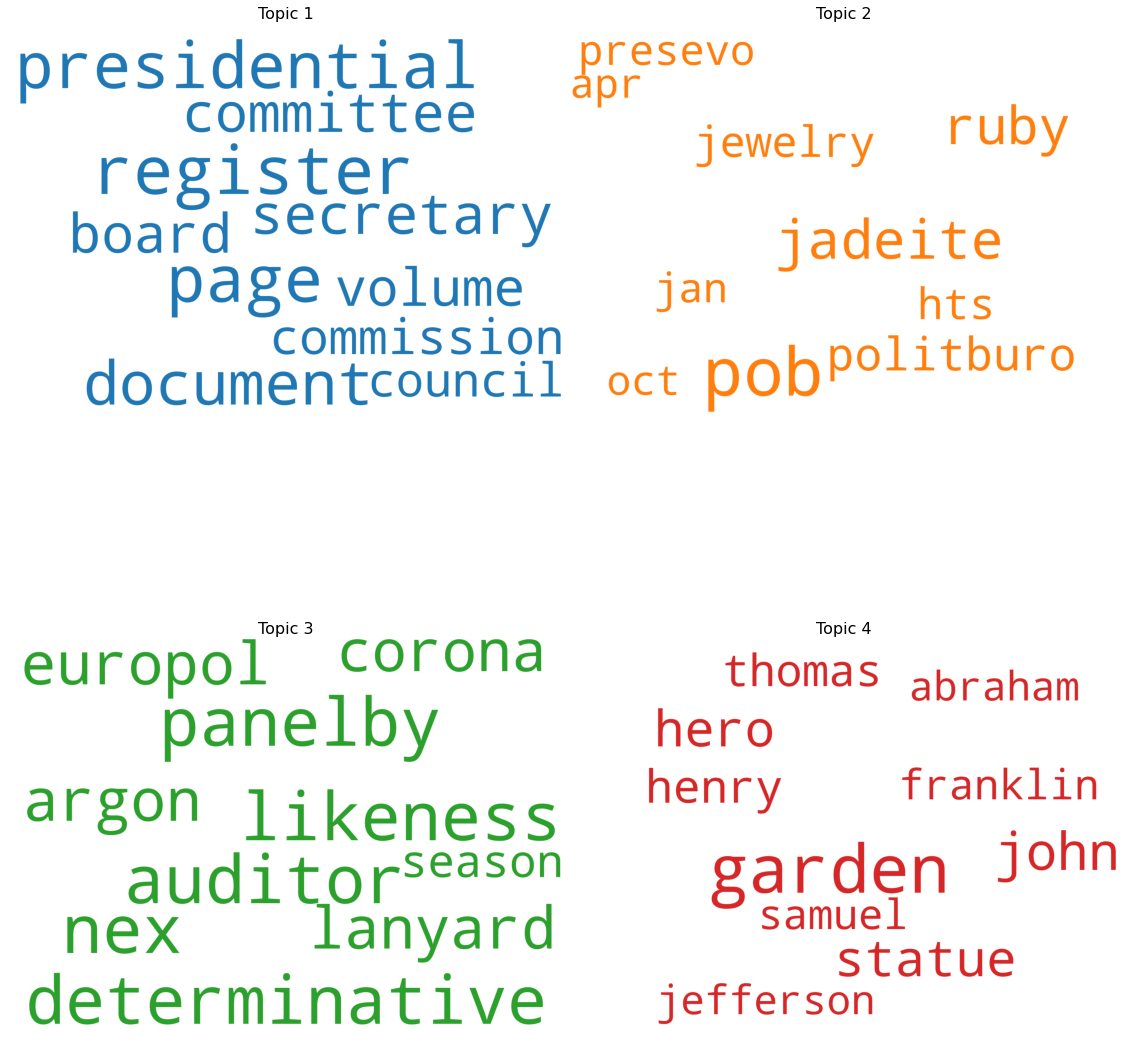

In [52]:
# Use TopicModels class to apply LDA use k = 4 initially
lda_orders = LDA_barrosoluquer(clean_orders)
lda_orders_6 = lda_orders.applyLDA(numtopics=4)
lda_orders.generate_topic_wordcloud(lda_orders_6)

In [53]:
# Run grid serach by varying hyperparams
params_grid = {
     'alpha_range':[.6,.8, 1],
     'beta_range':[.6,.8, 1],
     'num_topics_range': [4, 6, 8, 10,15,20]}
results_df = lda_orders.grid_search(params_grid)
results_df

,Models,alpha,beta,num_topics,coherence_score
58,"LdaModel(num_terms=10227, num_topics=15, decay...",1,0.8,15,0.529558
65,"LdaModel(num_terms=10227, num_topics=20, decay...",1,1,20,0.515750
89,"LdaModel(num_terms=10227, num_topics=20, decay...",asymmetric,1,20,0.503341
11,"LdaModel(num_terms=10227, num_topics=20, decay...",0.6,0.8,20,0.492387
41,"LdaModel(num_terms=10227, num_topics=20, decay...",0.8,1,20,0.483676
...,...,...,...,...,...
12,"LdaModel(num_terms=10227, num_topics=4, decay=...",0.6,1,4,0.372674
84,"LdaModel(num_terms=10227, num_topics=4, decay=...",asymmetric,1,4,0.371831
56,"LdaModel(num_terms=10227, num_topics=8, decay=...",1,0.8,8,0.368773
48,"LdaModel(num_terms=10227, num_topics=4, decay=...",1,0.6,4,0.364885


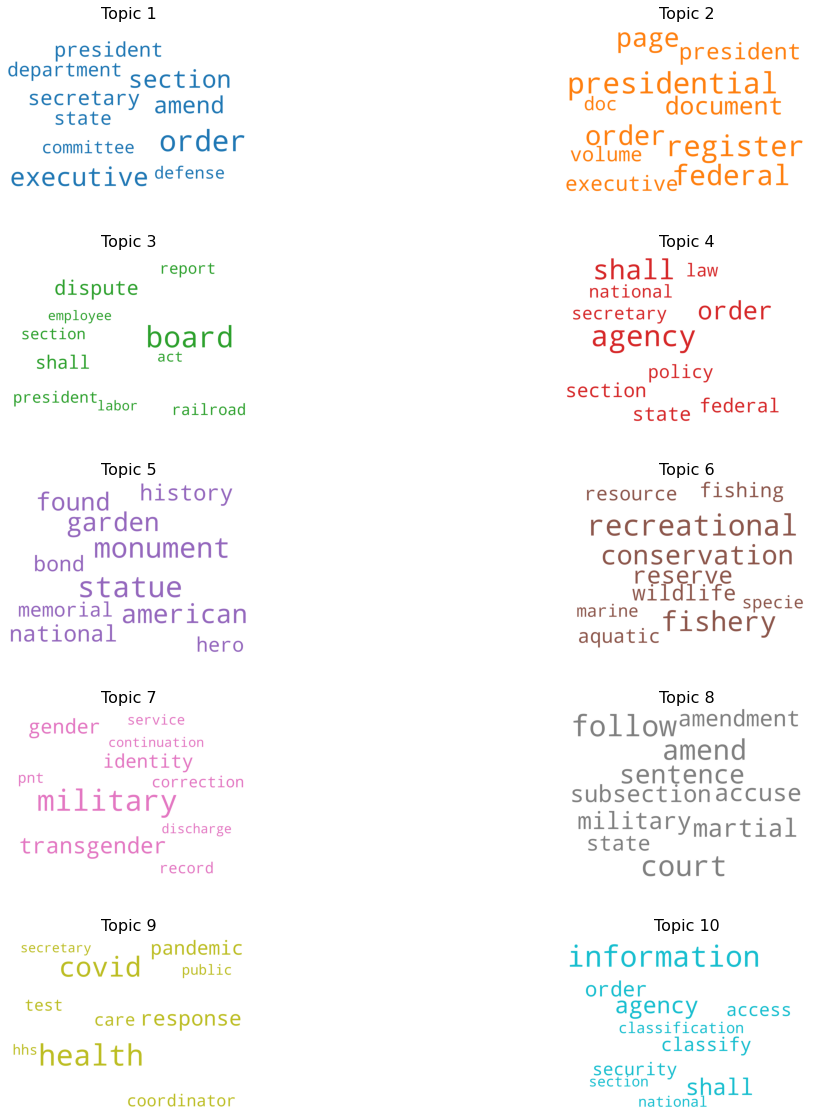

In [55]:
lda_orders.generate_topic_wordcloud(ldamodel=results_df.iloc[0,0])

In [58]:
results_df.iloc[0,0].num_topics

15

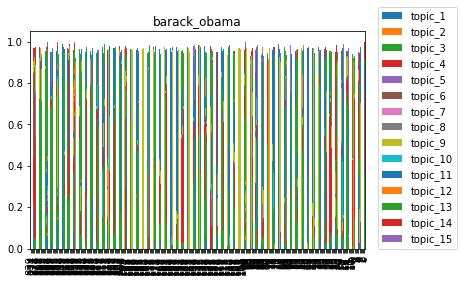

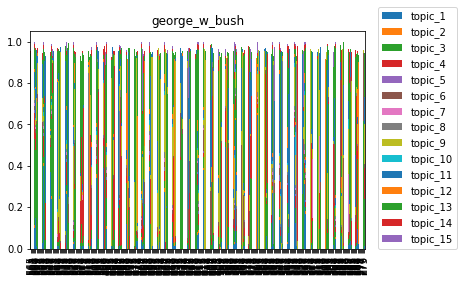

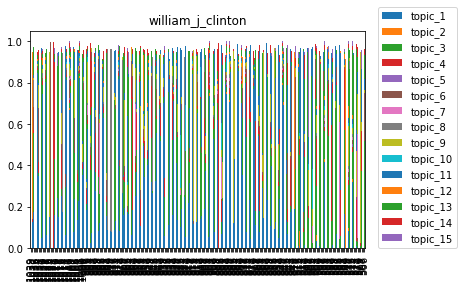

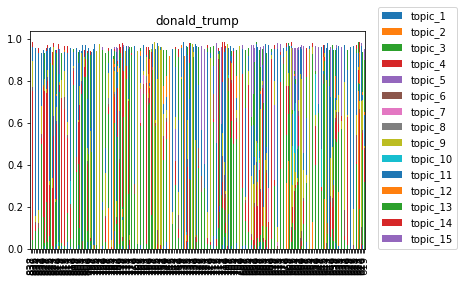

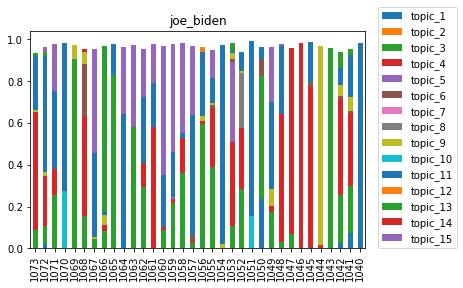

In [56]:
for president in exec_orders.president.unique():
    order_idx = exec_orders.loc[exec_orders.president == president].index.tolist()
    order_idx.reverse()
    lda_orders.generate_bar_plot(ldamodel=results_df.iloc[0,0], 
                                 docs_to_view=order_idx, title=president)

In [59]:
# replication of Roberto's word embeddings but for exec orders
exec_orders.president.unique()

array(['barack_obama', 'george_w_bush', 'william_j_clinton',
       'donald_trump', 'joe_biden'], dtype=object)

In [60]:
party_affiliation = {'barack_obama': 'Democrat',
                    'george_w_bush': 'Republican',
                    'william_j_clinton': 'Democrat',
                    'donald_trump': 'Republican',
                    'joe_biden': 'Democrat'}

In [61]:
#exec_orders['tokenized_sentences'] = exec_orders['clean_text'].apply()
exec_orders['tokenized_sentences'] = exec_orders['clean_text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
exec_orders['normalized_sentences'] = exec_orders['tokenized_sentences'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [62]:
exec_orders["Party"] = exec_orders.president.apply(lambda row: party_affiliation[row])

In [63]:
democrats = exec_orders.loc[exec_orders.Party=="Democrat", :]
republicans = exec_orders.loc[exec_orders.Party=="Republican", :]

In [64]:
democratsW2V  = gensim.models.word2vec.Word2Vec(democrats['normalized_sentences'].sum(),window=10)
republicansW2V = gensim.models.word2vec.Word2Vec(republicans['normalized_sentences'].sum(),window=10)

In [65]:
words_of_interest = ["climate", "energy", "environment", "fuel",
                     "pollution", "emissions", "clean", "coal", "oil", "carbon"]

for word in words_of_interest:
    print()
    print(f"Finding words most similar to '{word}' according to its embedding")
    try:
        print("................................................................")
        print("Based on Republican embedding:")
        rep_words_tupple = republicansW2V.most_similar(word)
        rep_words = [word for word, score in rep_words_tupple]
        print(rep_words_tupple)
        sentiment = SentimentScorer.polarity_scores(" ".join(rep_words))
        print(f"Sentiment {sentiment['compound']}")
        print()
        print("Based on Democrats embedding:")
        dem_words_tupple = democratsW2V.most_similar(word)
        dem_words = [word for word, score in dem_words_tupple]
        sentiment_dem = SentimentScorer.polarity_scores(" ".join(dem_words))
        print(dem_words_tupple)
        print(f"Sentiment {sentiment_dem['compound']}")
        print()
        print()
    except:
        continue


Finding words most similar to 'climate' according to its embedding
................................................................
Based on Republican embedding:
[('conference', 0.8943452835083008), ('launch', 0.8908724784851074), ('pollution', 0.8903526067733765), ('scalable', 0.8880280256271362), ('tree', 0.8840777277946472), ('suppression', 0.8813032507896423), ('modernize', 0.8777592182159424), ('mathematics', 0.8740977048873901), ('rehabilitation', 0.8734374046325684), ('methane', 0.8698295950889587)]

Finding words most similar to 'energy' according to its embedding
................................................................
Based on Republican embedding:
[('water', 0.8207719326019287), ('forecast', 0.7985769510269165), ('transportation', 0.7932743430137634), ('infrastructure', 0.7524186372756958), ('protection', 0.7504978775978088), ('development', 0.7432593703269958), ('analysis', 0.7362589836120605), ('production', 0.7324534058570862), ('technology', 0.7274103164672852)